In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from math import floor, ceil
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dietary = pd.read_csv('./Dietary.csv')

In [3]:
dietary

,Aadhaar,Date,Grains,Pulses,Other Fruits,Leafy Vegetables,Other Vegetables,Dairy,"Meat, Poultry and Fish",Vitamin A Rich,Nuts and Seeds,Eggs,Junk Foods
0,1234567100,2021-07-01,1,1,0,0,0,0,0,0,0,0,1
1,1234567100,2021-07-02,1,1,0,0,0,0,0,0,0,0,1
2,1234567100,2021-07-03,1,1,0,0,0,0,1,0,0,0,1
3,1234567100,2021-07-04,1,1,0,0,0,0,0,0,0,0,1
4,1234567100,2021-07-05,1,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219,990095966133,2021-10-03,1,1,0,0,0,0,0,0,0,0,1
10220,990095966133,2021-10-04,1,0,0,0,0,0,0,0,0,1,0
10221,990095966133,2021-10-05,1,1,0,0,0,0,0,0,0,0,1
10222,990095966133,2021-10-06,1,1,0,0,0,0,0,0,0,0,1


In [6]:
types = ['Grains', 'Pulses', 'Other Fruits',
       'Leafy Vegetables', 'Other Vegetables', 'Dairy',
       'Meat, Poultry and Fish', 'Vitamin A Rich', 'Nuts and Seeds', 'Eggs',
       'Junk Foods']

In [88]:
ds1 = pd.DataFrame(columns=['Aadhaar', 'Grains', 'Pulses', 'Other Fruits',
       'Leafy Vegetables', 'Other Vegetables', 'Dairy',
       'Meat, Poultry and Fish', 'Vitamin A Rich', 'Nuts and Seeds', 'Eggs',
       'Junk Foods'])

types = ['Grains', 'Pulses', 'Other Fruits',
       'Leafy Vegetables', 'Other Vegetables', 'Dairy',
       'Meat, Poultry and Fish', 'Vitamin A Rich', 'Nuts and Seeds', 'Eggs',
       'Junk Foods']

for i in dietary['Aadhaar'].unique():
       temp = dietary[dietary['Aadhaar'] == i]

       k = [i]

       for ftype in types:
              k = k + [1 if 1 in list(temp[ftype]) else 0]
              

       ds1.loc[len(ds1.index)] = k  


In [89]:
out = pd.DataFrame(columns=['Food Type', 'Count'])

for ftype in types:
    out.loc[len(out)] = [ftype, ds1[ftype].sum()]

In [90]:
out

,Food Type,Count
0,Grains,401
1,Pulses,393
2,Other Fruits,160
3,Leafy Vegetables,204
4,Other Vegetables,143
5,Dairy,160
6,"Meat, Poultry and Fish",293
7,Vitamin A Rich,71
8,Nuts and Seeds,83
9,Eggs,391


In [91]:
px.bar(out, x = 'Food Type', y = 'Count')

In [92]:
ds2 = pd.DataFrame(columns=['Aadhaar', 'Grains', 'Pulses', 'Other Fruits',
       'Leafy Vegetables', 'Other Vegetables', 'Dairy',
       'Meat, Poultry and Fish', 'Vitamin A Rich', 'Nuts and Seeds', 'Eggs',
       'Junk Foods'])

for i in dietary['Aadhaar'].unique():
       temp = dietary[dietary['Aadhaar'] == i]

       k = [i]

       for ftype in types:
            k = k + [temp[ftype].sum()]
              

       ds2.loc[len(ds2.index)] = k  


In [93]:
ds2

,Aadhaar,Grains,Pulses,Other Fruits,Leafy Vegetables,Other Vegetables,Dairy,"Meat, Poultry and Fish",Vitamin A Rich,Nuts and Seeds,Eggs,Junk Foods
0,1234567100,28,22,0,0,0,1,3,0,0,5,24
1,1234567101,28,21,0,0,0,0,3,0,0,7,27
2,1234567102,28,26,0,0,0,0,3,0,0,5,27
3,1234567103,28,20,0,0,0,0,4,0,0,5,28
4,1234567104,28,22,5,0,0,0,2,0,0,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...
396,923345668286,28,17,0,6,7,4,5,5,2,6,19
397,925648752750,28,16,4,1,9,11,5,3,4,7,22
398,940201987740,27,13,0,0,1,0,0,2,0,5,22
399,987419958816,28,18,2,0,3,0,2,2,0,8,28


In [94]:
num = 10

out = pd.DataFrame(columns=['Food Type', 'Count'])

for ftype in types:
    out.loc[len(out)] = [ftype, len([i for i in ds2[ftype] if i >= num])]

In [95]:
px.bar(out, x = 'Food Type', y = 'Count')

In [96]:
red = []
yellow = []
green = []

for i in dietary['Aadhaar'].unique():
     temp = dietary[dietary['Aadhaar'] == i]

     k = 0

     for ftype in types:
          if 1 in list(temp[ftype]):
               k += 1
          else:
               k += 0

     if k in range(1, 5):
          red.append(i)
     elif k in range(5, 7):
          yellow.append(i)
     elif k in range(7, 12):
          green.append(i)

fig = go.Figure(data = [go.Bar(
     x = ['Dietary Diversity : 1-4', 'Dietary Diversity : 5-6', 'Dietary Diversity : 7-11'],
     y = [len(red), len(yellow), len(green)],
     marker_color = ['red', 'yellow', 'green']
)])


In [97]:
import pandas, plotly, streamlit, numpy

In [98]:
ds1

,Aadhaar,Grains,Pulses,Other Fruits,Leafy Vegetables,Other Vegetables,Dairy,"Meat, Poultry and Fish",Vitamin A Rich,Nuts and Seeds,Eggs,Junk Foods
0,1234567100,1,1,0,0,0,1,1,0,0,1,1
1,1234567101,1,1,0,0,0,0,1,0,0,1,1
2,1234567102,1,1,0,0,0,0,1,0,0,1,1
3,1234567103,1,1,0,0,0,0,1,0,0,1,1
4,1234567104,1,1,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
396,923345668286,1,1,0,1,1,1,1,1,1,1,1
397,925648752750,1,1,1,1,1,1,1,1,1,1,1
398,940201987740,1,1,0,0,1,0,0,1,0,1,1
399,987419958816,1,1,1,0,1,0,1,1,0,1,1


In [99]:
ds1.columns

Index(['Aadhaar', 'Grains', 'Pulses', 'Other Fruits', 'Leafy Vegetables',
       'Other Vegetables', 'Dairy', 'Meat, Poultry and Fish', 'Vitamin A Rich',
       'Nuts and Seeds', 'Eggs', 'Junk Foods'],
      dtype='object')

In [100]:
ds1['Variety'] = ds1[['Grains', 'Pulses', 'Other Fruits', 'Leafy Vegetables',
       'Other Vegetables', 'Dairy', 'Meat, Poultry and Fish', 'Vitamin A Rich',
       'Nuts and Seeds', 'Eggs', 'Junk Foods']].sum(axis=1)

In [101]:
ds1

,Aadhaar,Grains,Pulses,Other Fruits,Leafy Vegetables,Other Vegetables,Dairy,"Meat, Poultry and Fish",Vitamin A Rich,Nuts and Seeds,Eggs,Junk Foods,Variety
0,1234567100,1,1,0,0,0,1,1,0,0,1,1,6.0
1,1234567101,1,1,0,0,0,0,1,0,0,1,1,5.0
2,1234567102,1,1,0,0,0,0,1,0,0,1,1,5.0
3,1234567103,1,1,0,0,0,0,1,0,0,1,1,5.0
4,1234567104,1,1,1,0,0,0,1,0,0,1,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,923345668286,1,1,0,1,1,1,1,1,1,1,1,10.0
397,925648752750,1,1,1,1,1,1,1,1,1,1,1,11.0
398,940201987740,1,1,0,0,1,0,0,1,0,1,1,6.0
399,987419958816,1,1,1,0,1,0,1,1,0,1,1,8.0


In [102]:
ds1['Variety'].value_counts()

6.0     100
7.0      66
5.0      61
8.0      58
4.0      39
9.0      36
10.0     22
11.0     14
3.0       5
Name: Variety, dtype: int64

In [103]:
dietary['Sum'] = dietary[['Grains', 'Pulses', 'Other Fruits', 'Leafy Vegetables',
       'Other Vegetables', 'Dairy', 'Meat, Poultry and Fish', 'Vitamin A Rich',
       'Nuts and Seeds', 'Eggs']].sum(axis =1)
red = []
yellow = []
green = []

for i in dietary['Aadhaar'].unique():
    temp = dietary[dietary['Aadhaar'] == i]

    k = ceil(temp['Sum'].mean())

    if k in range(1, 5):
        red.append(i)
    elif k in range(5, 7):
        yellow.append(i)
    elif k in range(7, 11):
        green.append(i)

fig = go.Figure(data = [go.Bar(
    x = ['Dietary Diversity : 1-4', 'Dietary Diversity : 5-6', 'Dietary Diversity : 7-10'],
    y = [len(red), len(yellow), len(green)],
    marker_color = ['red', 'yellow', 'green']
)])

fig.update_layout(title_text = 'Food Groups Consumed, Ceiling of Mean')

<AxesSubplot:ylabel='Frequency'>

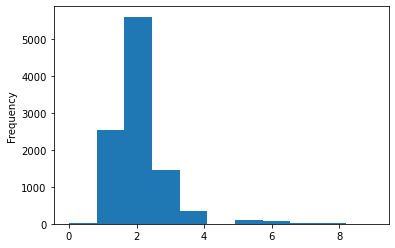

In [104]:
dietary['Sum'].plot(kind = 'hist', bins = 11)

<AxesSubplot:ylabel='Frequency'>

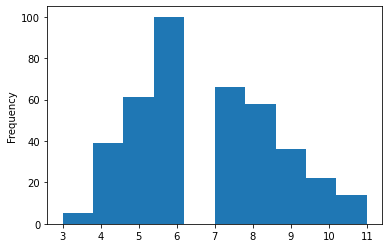

In [105]:
ds1['Variety'].plot(kind = 'hist')

<AxesSubplot:>

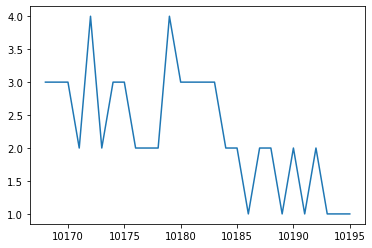

In [106]:
dietary[dietary['Aadhaar'] == 987419958816]['Sum'].plot(kind = 'line')

In [4]:
dietary['Date'] = pd.to_datetime(dietary['Date'], infer_datetime_format=True)
dietary['Day'] = dietary['Date'].dt.dayofweek

[0.992872416250891, 0.9935851746258019, 0.99215965787598, 0.9829059829059829, 0.9875311720698254, 0.9850374064837906, 0.9900213827512473]
[0.5673556664290805, 0.5652173913043478, 0.5595153243050606, 0.5747863247863247, 0.6427680798004988, 0.6415211970074813, 0.5445473984319316]
[0.05702066999287242, 0.03492516037063435, 0.037776193870277974, 0.02492877492877493, 0.043017456359102244, 0.04239401496259352, 0.048467569493941556]
[0.05844618674269423, 0.04918032786885246, 0.045616535994297935, 0.045584045584045586, 0.05236907730673317, 0.05361596009975062, 0.037776193870277974]
[0.036350677120456164, 0.036350677120456164, 0.040627227369921595, 0.037037037037037035, 0.0442643391521197, 0.05423940149625935, 0.03848895224518888]
[0.044191019244476125, 0.03563791874554526, 0.045616535994297935, 0.03774928774928775, 0.043640897755610975, 0.04114713216957606, 0.045616535994297935]
[0.06058446186742694, 0.06628652886671418, 0.07840342124019957, 0.06766381766381767, 0.06483790523690773, 0.08728179

Text(0.5, 1.0, 'Variation in Food Intake by Day of the Week')

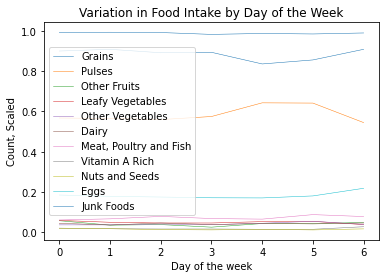

In [16]:
from operator import truediv

for ftype in types:
    #days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    days = [i for i in range(7)]
    change = []
    dayCount = [len(dietary[dietary.Day == day]) for day in range(7)]
    for day in range(7):
        change.append(dietary[dietary['Day'] == day][ftype].sum())

    countScaled = list(map(truediv, change, dayCount))
    print(countScaled)
    plt.plot(days, countScaled, rasterized = False, linewidth = 0.5)
plt.legend(types)
plt.xlabel('Day of the week')
plt.ylabel('Count, Scaled')
plt.title('Variation in Food Intake by Day of the Week')

In [12]:
change

[1263, 1275, 1251, 1255, 1341, 1373, 1275]

In [11]:
for day in range(7):
    print(f'{day} : {len(dietary[dietary.Day == day])}')

0 : 1403
1 : 1403
2 : 1403
3 : 1404
4 : 1604
5 : 1604
6 : 1403


In [109]:
delta = pd.DataFrame(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

for ftype in types:
    days = [i for i in range(7)]
    change = []
    for day in range(7):
        change.append(dietary[dietary['Day'] == day][ftype].sum())
    delta.loc[ftype] = change

px.line(delta.transpose(), markers=True)

In [110]:
delta

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Grains,1393,1394,1392,1380,1584,1580,1389
Pulses,796,793,785,807,1031,1029,764
Other Fruits,80,49,53,35,69,68,68
Leafy Vegetables,82,69,64,64,84,86,53
Other Vegetables,51,51,57,52,71,87,54
Dairy,62,50,64,53,70,66,64
"Meat, Poultry and Fish",85,93,110,95,104,140,109
Vitamin A Rich,28,24,22,22,23,23,38
Nuts and Seeds,27,24,18,16,23,18,23
Eggs,259,250,245,240,273,289,306


In [130]:
from scipy.spatial.distance import *
russelRao = pd.DataFrame(columns= types)

In [133]:
for type1 in types:
    k = []
    for type2 in types:
        k.append(jaccard(dietary[type1], dietary[type2]))
    
    russelRao.loc[type1] = k

In [134]:
russelRao

,Grains,Pulses,Other Fruits,Leafy Vegetables,Other Vegetables,Dairy,"Meat, Poultry and Fish",Vitamin A Rich,Nuts and Seeds,Eggs,Junk Foods
Grains,0.000000,0.410082,0.958576,0.950875,0.958683,0.961376,0.927215,0.982401,0.985466,0.818899,0.117132
Pulses,0.410082,0.000000,0.939439,0.949637,0.935233,0.952117,0.933892,0.976840,0.979605,0.891191,0.433705
Other Fruits,0.958576,0.939439,0.000000,0.955932,0.902597,0.913155,0.972493,0.951220,0.934701,0.965111,0.957437
Leafy Vegetables,0.950875,0.949637,0.955932,0.000000,0.924419,0.914918,0.967473,0.901771,0.982812,0.953982,0.954839
Other Vegetables,0.958683,0.935233,0.902597,0.924419,0.000000,0.836066,0.963327,0.847036,0.887160,0.956144,0.965766
Dairy,0.961376,0.952117,0.913155,0.914918,0.836066,0.000000,0.957028,0.892727,0.905303,0.951967,0.965676
"Meat, Poultry and Fish",0.927215,0.933892,0.972493,0.967473,0.963327,0.957028,0.000000,0.963801,0.988571,0.878238,0.927309
Vitamin A Rich,0.982401,0.976840,0.951220,0.901771,0.847036,0.892727,0.963801,0.000000,0.955556,0.962925,0.986914
Nuts and Seeds,0.985466,0.979605,0.934701,0.982812,0.887160,0.905303,0.988571,0.955556,0.000000,0.991474,0.984629
Eggs,0.818899,0.891191,0.965111,0.953982,0.956144,0.951967,0.878238,0.962925,0.991474,0.000000,0.839970


<AxesSubplot:>

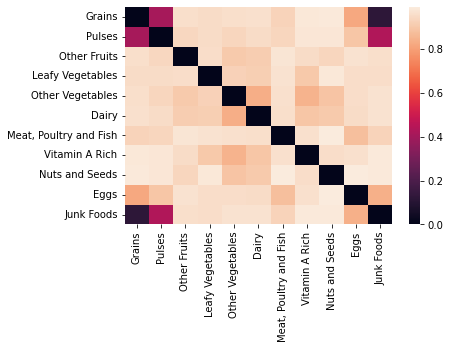

In [135]:
sns.heatmap(russelRao)

In [132]:
jaccard(list(dietary['Dairy']), list(dietary['Dairy']))

0.0

0        0
1        0
2        0
3        0
4        0
        ..
10219    0
10220    0
10221    0
10222    0
10223    0
Name: Dairy, Length: 10224, dtype: int64 0        0
1        0
2        0
3        0
4        0
        ..
10219    0
10220    0
10221    0
10222    0
10223    0
Name: Dairy, Length: 10224, dtype: int64
